In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q


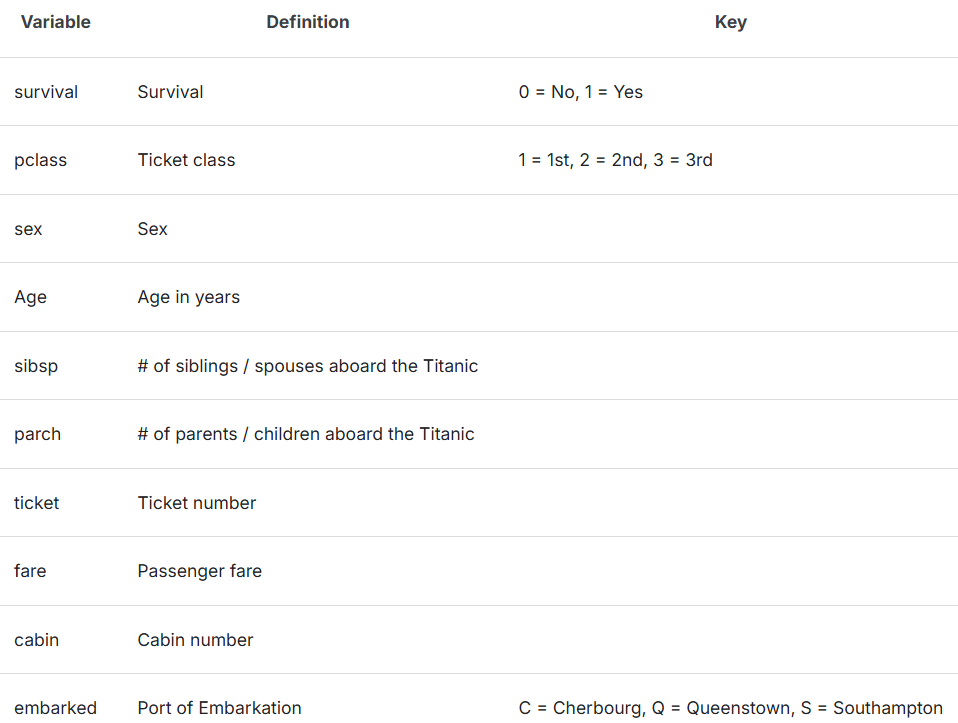

Removing the passenger id, name and ticket columns as they don't impact the output

In [4]:
df=df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [5]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
611,0,3,male,NaN,0,0,7.0500,NaN,S
616,0,3,male,34.0,1,1,14.4000,NaN,S
868,0,3,male,NaN,0,0,9.5000,NaN,S
104,0,3,male,37.0,2,0,7.9250,NaN,S
52,1,1,female,49.0,1,0,76.7292,D33,C


In [7]:
# checking if only the first clas passengers were given cabins

df[df['Pclass']==1].isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         30
SibSp        0
Parch        0
Fare         0
Cabin       40
Embarked     2
dtype: int64

In [8]:
df['Cabin'].isnull().sum()

687

In [9]:
df[(df['Pclass'] != 1) & (df['Cabin'].notnull())]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
10,1,3,female,4.0,1,1,16.7000,G6,S
21,1,2,male,34.0,0,0,13.0000,D56,S
66,1,2,female,29.0,0,0,10.5000,F33,S
75,0,3,male,25.0,0,0,7.6500,F G73,S
123,1,2,female,32.5,0,0,13.0000,E101,S
128,1,3,female,NaN,1,1,22.3583,F E69,C
148,0,2,male,36.5,0,2,26.0000,F2,S
183,1,2,male,1.0,2,1,39.0000,F4,S
193,1,2,male,3.0,1,1,26.0000,F2,S
205,0,3,female,2.0,0,1,10.4625,G6,S


Since cabin might give us information about whether the passengers will survive or not but their exact values don't matter, we can make it a boolean variable as to it was assigned or not

In [10]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [12]:
df=df.drop(columns=['Cabin'])

In [13]:
df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
738,0,3,male,NaN,0,0,7.8958,S,0
77,0,3,male,NaN,0,0,8.0500,S,0
340,1,2,male,2.0,1,1,26.0000,S,1


In [14]:
df['NoOfRelatives']=df['SibSp']+df['Parch']

In [16]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,NoOfRelatives
581,1,1,female,39.0,1,1,110.8833,C,1,2
449,1,1,male,52.0,0,0,30.5000,S,1,0
435,1,1,female,14.0,1,2,120.0000,S,1,3
877,0,3,male,19.0,0,0,7.8958,S,0,0
79,1,3,female,30.0,0,0,12.4750,S,0,0


In [17]:
df=df.drop(columns=['SibSp','Parch'])

In [21]:
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin,NoOfRelatives
652,0,3,male,21.0,8.4333,S,0,0
437,1,2,female,24.0,18.7500,S,0,5
859,0,3,male,NaN,7.2292,C,0,0
876,0,3,male,20.0,9.8458,S,0,0
819,0,3,male,10.0,27.9000,S,0,5


In [19]:
from sklearn.impute import SimpleImputer

si=SimpleImputer(strategy='mean')

In [20]:
# impute the age column with mean

In [22]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
Fare               0
Embarked           2
HasCabin           0
NoOfRelatives      0
dtype: int64

In [32]:
df=df.drop(columns=['Fare'])

In [33]:
df.sample(3)

,Survived,Pclass,Sex,Age,Embarked,HasCabin,NoOfRelatives
49,0,3,female,18.0,S,0,1
732,0,2,male,NaN,S,0,0
407,1,2,male,3.0,S,0,2


In [34]:
si1=SimpleImputer(strategy='most_frequent')

In [35]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[['female','male'], ['S','C','Q']])

In [37]:
# replace the no of relatives with has relatives as this is the only thing that will matter
df['HasRelatives'] = np.where(df['NoOfRelatives'] == 0 , 0, 1)

In [38]:
df.sample(3)

,Survived,Pclass,Sex,Age,Embarked,HasCabin,NoOfRelatives,HasRelatives
884,0,3,male,25.0,S,0,0,0
713,0,3,male,29.0,S,0,0,0
529,0,2,male,23.0,S,0,3,1


In [39]:
df=df.drop(columns=['NoOfRelatives'])

In [40]:
df.sample(3)

,Survived,Pclass,Sex,Age,Embarked,HasCabin,HasRelatives
29,0,3,male,NaN,S,0,0
77,0,3,male,NaN,S,0,0
541,0,3,female,9.0,S,0,1


In [46]:
from sklearn.compose import ColumnTransformer

In [76]:
# we need to impute embarked beforehand because operations in a column transformer happen parallelly
transformer1=ColumnTransformer([
    ('imputer',si1,'Embarked')
], remainder='passthrough')

In [77]:
transformer2=ColumnTransformer([
    ('imputer1',si,['Age']),
    ('ordinal_encoding',oe,['Sex','Embarked'])
], remainder='passthrough')

In [78]:
X = df.drop(columns=['Survived'])
y = df[['Survived']] # Changed to double square brackets to make y a DataFrame

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=None,        # No limit on depth
    random_state=42
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

sex_categories = ['female', 'male'] 
embarked_categories = ['S', 'C', 'Q']

# Create pipelines for columns needing multiple steps
embarked_pipeline = Pipeline([
    ('imputer', si1), # si1 is your SimpleImputer for Embarked
    ('encoder', OrdinalEncoder(categories=[embarked_categories]))
])

sex_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[sex_categories]))
])

# Define the main preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('age_imputer', si, ['Age']),
        ('sex_processing', sex_pipeline, ['Sex']),
        ('embarked_processing', embarked_pipeline, ['Embarked'])
    ],
    remainder='passthrough', # Keep other columns
    force_int_remainder_cols=False
)

In [109]:
from sklearn.pipeline import Pipeline

pipe1=Pipeline([
    ('preprocessor',preprocessor),
    ('model',dt)
])

In [110]:
pipe2=Pipeline([
    ('preprocessor',preprocessor),
    ('model',rf)
])

In [111]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(), ['Age']),
                                                 ('sex_processing',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['female',
                                                                                               'male']]))]),
                                                  ['Sex']),
                                                 ('embarked_processing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['S',
                                                                                               'C',
                                                                                               'Q']]))]),
                                                  ['Embarked'])])),
                ('model', DecisionTreeClassifier())])

In [112]:
pipe2.fit(X_train,y_train)

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('age_imputer',
                                                  SimpleImputer(), ['Age']),
                                                 ('sex_processing',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['female',
                                                                                               'male']]))]),
                                                  ['Sex']),
                                                 ('embarked_processing',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['S',
                                                                                               'C',
                                                                                               'Q']]))]),
                                                  ['Embarked'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [113]:
y_pred1=pipe1.predict(X_test)
y_pred2=pipe2.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy of Decision Tree: {accuracy1*100:.2f}")

accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy of Random Forest: {accuracy2*100:.2f}")

Accuracy of Decision Tree: 77.65
Accuracy of Random Forest: 78.21
